# Marketing Strategy Analysis

### Table of Content
1. Introduction
2. Data Loading and Quality
3. Feature Additions and Engineering
4. Exploratory Data Analysis and Statistical Analysis
5. Final Recommendations(Optimal Sales)


### 1. Introduction

- What is the impact of each marketing strategy and sales visit on Sales (Amount Collected)?
- Is the same strategy valid for all the different client types ?

### 2. Data Loading and Quality Checks

In [205]:
import piplite
await piplite.install("seaborn")

In [206]:
piplite.install("statsmodels")

<PyodideTask pending name='Task-285' coro=<_install() running at /lib/python3.11/site-packages/piplite/piplite.py:105> cb=[WebLoop._decrement_in_progress()]>

In [207]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

In [209]:
import seaborn as sns

In [144]:
df = pd.read_csv("Campaign-Data.csv")
df.head()

,Client ID,Client Type,Number of Customers,Montly Target,Zip Code,Calendardate,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Number of Competition
0,ID-987275,Medium Facility,2800,125,1003,16-01-2014,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
1,ID-987275,Medium Facility,2800,125,1003,16-02-2014,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,Low
2,ID-987275,Medium Facility,2800,125,1003,18-03-2014,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low
3,ID-987275,Medium Facility,2800,125,1003,18-04-2014,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,Low
4,ID-987275,Medium Facility,2800,125,1003,19-05-2014,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Low


In [145]:
df.dtypes

Client ID                 object
Client Type               object
Number of Customers        int64
Montly Target              int64
Zip Code                   int64
Calendardate              object
Amount Collected           int64
Unit Sold                  int64
Campaign (Email)         float64
Campaign (Flyer)         float64
Campaign (Phone)         float64
Sales Contact 1          float64
Sales Contact 2          float64
Sales Contact 3          float64
Sales Contact 4          float64
Sales Contact 5          float64
Number of Competition     object
dtype: object

### 3. Feature Additions and Engineering

In [146]:
df['Calendardate'] = pd.to_datetime(df['Calendardate'], dayfirst = False)
df['Calendar_Month'] = df['Calendardate'].dt.month
df['Calendar_Year'] = df['Calendardate'].dt.year

<ipython-input-146-511b4b021c1e>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Calendardate'] = pd.to_datetime(df['Calendardate'], dayfirst = False)


### 4. Exploratory Data Analysis and Statistical Analysis

<b> 4.1 Exploring and Understanding basics data </b>

1. Distribution of Data across different accounts


<b> 4.2 Statistical Analysis - Answering the Questions</b>
1. Impact of Marketing Strategy on Sales (Using Correlation, Regression and Decision Tree)
2. Impact of Competition on Sales
3. How different types of client can have different strategies (Broken down Question 1 and Question 2 based on Account Type)


In [147]:
df['Client Type'].value_counts(normalize=True)

Large Facility      0.459677
Small Facility      0.282258
Medium Facility     0.169355
Private Facility    0.088710
Name: Client Type, dtype: float64

In [148]:
pd.crosstab(df['Number of Competition'],df['Client Type'], margins = True, normalize=True)  

Client Type,Large Facility,Medium Facility,Private Facility,Small Facility,All
Number of Competition,,,,,
High,0.076613,0.028226,0.014785,0.047043,0.166667
Low,0.383065,0.141129,0.073925,0.235215,0.833333
All,0.459677,0.169355,0.088710,0.282258,1.000000


In [149]:
df.corr(numeric_only=True)[['Amount Collected']]

,Amount Collected
Number of Customers,0.607496
Montly Target,0.608204
Zip Code,NaN
Amount Collected,1.000000
Unit Sold,0.997515
Campaign (Email),0.248235
Campaign (Flyer),0.444337
Campaign (Phone),0.034858
Sales Contact 1,0.277478
Sales Contact 2,0.552112


In [150]:
X=df.drop(['Zip Code','Client ID','Client Type','Number of Competition','Calendardate'],axis=1)
X.head()

,Number of Customers,Montly Target,Amount Collected,Unit Sold,Campaign (Email),Campaign (Flyer),Campaign (Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5,Calendar_Month,Calendar_Year
0,2800,125,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2014
1,2800,125,3409460,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,322500.0,2,2014
2,2800,125,10228384,75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2014
3,2800,125,17047304,123,0.0,0.0,0.0,0.0,3547500.0,1290000.0,0.0,0.0,4,2014
4,2800,125,23866224,171,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,2014


In [366]:
##Check for Multicollinearity for columns (Campaign(Email), Campaign(Flyer), Campaign(Phone),Sales Contact 1,Sales Contact 2,Sales Contact 3,Sales Contact 4,Sales Contact 5)
## Since the values are below 5 we can conclude there is no multicollinearity between the variables
def ismulticollinear(X):
    vif_info = pd.DataFrame()
    vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_info['Column'] = X.columns
    return vif_info.sort_values('VIF', ascending=False)

In [367]:
ismulticollinear(X)

,VIF,Column
3,268.734154,Unit Sold
2,267.855738,Amount Collected
0,37.494815,Number of Customers
1,37.025175,Montly Target
13,5.528071,Calendar_Year
12,4.946248,Calendar_Month
8,2.850967,Sales Contact 2
9,2.359338,Sales Contact 3
5,1.562886,Campaign (Flyer)
7,1.304192,Sales Contact 1


<AxesSubplot:>

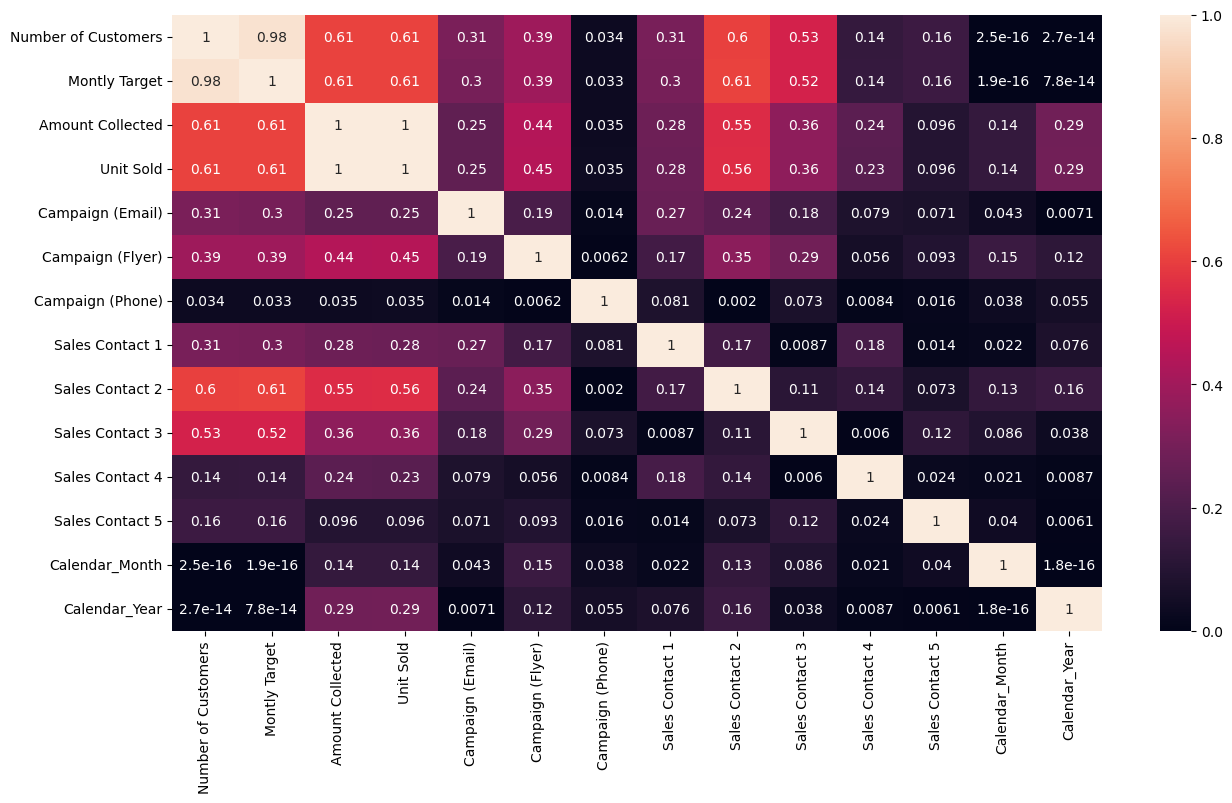

In [368]:
#Another way to check multicollinearity
plt.figure(figsize = (15,8))
sns.heatmap(X.corr().abs(), annot = True)

### Correlation Analysis

In [369]:
#Preparing data for analysis
data = df[['Client Type','Amount Collected','Campaign (Email)', 'Campaign (Flyer)', 'Campaign (Phone)','Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3','Sales Contact 4', 'Sales Contact 5']]

In [371]:
piplite.install("Jinja2")

<PyodideTask pending name='Task-454' coro=<_install() running at /lib/python3.11/site-packages/piplite/piplite.py:105> cb=[WebLoop._decrement_in_progress()]>

In [372]:
cm = sns.light_palette("purple", as_cmap=True)
correlation_analysis = data.corr()['Amount Collected'].reset_index()
correlation_analysis.columns = ['Impacting Variable','Degree of Linear Impact (Correlation)']
correlation_analysis = correlation_analysis[correlation_analysis['Impacting Variable'] != 'Amount Collected'].\
sort_values('Degree of Linear Impact (Correlation)',ascending=False)
correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)

<ipython-input-372-094bdf403c18>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_analysis = data.corr()['Amount Collected'].reset_index()
<ipython-input-372-094bdf403c18>:6: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)


,Impacting Variable,Degree of Linear Impact (Correlation)
5,Sales Contact 2,0.55
2,Campaign (Flyer),0.44
6,Sales Contact 3,0.36
4,Sales Contact 1,0.28
1,Campaign (Email),0.25
7,Sales Contact 4,0.24
8,Sales Contact 5,0.10
3,Campaign (Phone),0.03


### Market Strategy Impact on Sales (Broken by different account type)

In [373]:
cm = sns.light_palette('green',as_cmap=True)
correlation_analysis = df.groupby('Client Type')[['Amount Collected','Campaign (Email)', 'Campaign (Flyer)', \
'Campaign (Phone)','Sales Contact 1', 'Sales Contact 2', 'Sales Contact 3','Sales Contact 4', 'Sales Contact 5']].corr()[['Amount Collected']].reset_index()
correlation_analysis.columns=['Acc Type','Variable Impact on Sales','Impact']
correlation_analysis = correlation_analysis[correlation_analysis['Variable Impact on Sales'] != 'Amount Collected'].\
sort_values(['Acc Type','Impact'],ascending=False)
correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)

<ipython-input-373-4cec932b7361>:7: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlation_analysis.style.background_gradient(cmap=cm).set_precision(2)


,Acc Type,Variable Impact on Sales,Impact
32,Small Facility,Sales Contact 2,0.22
33,Small Facility,Sales Contact 3,0.07
28,Small Facility,Campaign (Email),0.06
29,Small Facility,Campaign (Flyer),0.04
34,Small Facility,Sales Contact 4,0.02
35,Small Facility,Sales Contact 5,0.00
31,Small Facility,Sales Contact 1,-0.02
30,Small Facility,Campaign (Phone),nan
23,Private Facility,Sales Contact 2,0.57
20,Private Facility,Campaign (Flyer),0.28


### Regression Analysis (Market Sales and Strategies)

In [374]:
data.columns

Index(['Client Type', 'Amount Collected', 'Campaign (Email)',
       'Campaign (Flyer)', 'Campaign (Phone)', 'Sales Contact 1',
       'Sales Contact 2', 'Sales Contact 3', 'Sales Contact 4',
       'Sales Contact 5'],
      dtype='object')

In [375]:
import statsmodels.formula.api as smf
data.columns = [mystring.replace(" ","_") for mystring in data.columns]
data.columns = [mystring.replace("(","") for mystring in data.columns]
data.columns = [mystring.replace(")","") for mystring in data.columns]
results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+\
       Campaign_Phone+Sales_Contact_1+Sales_Contact_2+\
       Sales_Contact_3+Sales_Contact_4+Sales_Contact_5',data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Amount_Collected   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     342.1
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        12:55:12   Log-Likelihood:                -54512.
No. Observations:                2976   AIC:                         1.090e+05
Df Residuals:                    2967   BIC:                         1.091e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.481e+06   5.12e+05      2.891      0.004    4.77e+05    2.49e+06
Campaign_Email      0.7932      0.597      1.329      0.184      -0.377       1.963
Campaign_Flyer      3.3376      0.260     12.831      0.000       2.828       3.848
Campaign_Phone      0.0734      1.053      0.070      0.944      -1.991       2.137
Sales_Contact_1     4.2368      0.415     10.207      0.000       3.423       5.051
Sales_Contact_2     3.6382      0.129     28.155      0.000       3.385       3.892
Sales_Contact_3     2.3432      0.131     17.925      0.000       2.087       2.600
Sales_Contact_4    10.9478      1.060     10.331      0.000       8.870      13.026
Sales_Contact_5     3.5078      4.549      0.771      0.441      -5.412      12.428
==============================================================================
Omnibus:                     1099.749   Durbin-Watson:                   0.624
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7733.226
Skew:                           1.578   Prob(JB):                         0.00
Kurtosis:                      10.239   Cond. No.                     5.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [376]:
R = results.summary().tables[1]
R = pd.DataFrame.from_records(R[1:],columns = R.data[0])
R = R.applymap(str)
for col in R.columns[1:]:
    R[col] = R[col].astype('float')
R.dtypes

            object
coef       float64
std err    float64
t          float64
P>|t|      float64
[0.025     float64
0.975]     float64
dtype: object

In [377]:
R = R.rename(columns={R.columns[0]: 'index'})
R = R[R['P>|t|'] < 0.05][['index','coef']]
R

,index,coef
0,Intercept,1.481000e+06
2,Campaign_Flyer,3.337600e+00
4,Sales_Contact_1,4.236800e+00
5,Sales_Contact_2,3.638200e+00
6,Sales_Contact_3,2.343200e+00
7,Sales_Contact_4,1.094780e+01


### Regression Analysis (Market Sales and Strategies) - Broken for different account types

In [567]:
consolidated_summary = pd.DataFrame()
for acctype in list(set(list(data['Client_Type']))):
    temp_df = data[data['Client_Type'] == acctype].copy()
    results = smf.ols('Amount_Collected ~ Campaign_Email+Campaign_Flyer+\
       Campaign_Phone+Sales_Contact_1+Sales_Contact_2+\
       Sales_Contact_3+Sales_Contact_4+Sales_Contact_5',data=temp_df).fit()
    temp_result = results.summary().tables[1]
    temp_result = pd.DataFrame.from_records(temp_result[1:],columns = temp_result.data[0])
    temp_result = temp_result.applymap(str)
    for col in temp_result.columns[1:]:
        temp_result[col] = temp_result[col].astype('float')
    temp_result = temp_result.rename(columns={temp_result.columns[0]: 'index'})
    temp_result = temp_result[temp_result['P>|t|'] < 0.05][['index','coef']] 
    temp_result.columns = ['Variable','Coefficent (Impact)']
    temp_result['Account_type'] = acctype
    temp_result = temp_result[temp_result['Variable']!='Intercept'].sort_values('Coefficent (Impact)',ascending=False)
    print(acctype)
    consolidated_summary = pd.concat([consolidated_summary, temp_result])
    print(temp_result)

Large Facility 
          Variable  Coefficent (Impact)     Account_type
4  Sales_Contact_1              11.6731  Large Facility 
7  Sales_Contact_4              10.6145  Large Facility 
5  Sales_Contact_2               4.0031  Large Facility 
2   Campaign_Flyer               2.7204  Large Facility 
6  Sales_Contact_3               2.0316  Large Facility 
3   Campaign_Phone              -3.5361  Large Facility 
Medium Facility
          Variable  Coefficent (Impact)     Account_type
2   Campaign_Flyer               4.1059  Medium Facility
5  Sales_Contact_2               3.5778  Medium Facility
4  Sales_Contact_1               3.1365  Medium Facility
6  Sales_Contact_3               2.1174  Medium Facility
Small Facility 
          Variable  Coefficent (Impact)     Account_type
5  Sales_Contact_2             0.810100  Small Facility 
3   Campaign_Phone             0.000004  Small Facility 
Private Facility
          Variable  Coefficent (Impact)      Account_type
5  Sales_Contact_2    

In [568]:
consolidated_summary.reset_index(inplace=True)
consolidated_summary.drop('index',axis=1,inplace=True)
consolidated_summary.style.background_gradient(cmap='RdYlGn').set_precision(2)

<ipython-input-568-af410320818b>:3: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  consolidated_summary.style.background_gradient(cmap='RdYlGn').set_precision(2)


,Variable,Coefficent (Impact),Account_type
0,Sales_Contact_1,11.67,Large Facility
1,Sales_Contact_4,10.61,Large Facility
2,Sales_Contact_2,4.00,Large Facility
3,Campaign_Flyer,2.72,Large Facility
4,Sales_Contact_3,2.03,Large Facility
5,Campaign_Phone,-3.54,Large Facility
6,Campaign_Flyer,4.11,Medium Facility
7,Sales_Contact_2,3.58,Medium Facility
8,Sales_Contact_1,3.14,Medium Facility
9,Sales_Contact_3,2.12,Medium Facility


In [569]:
consolidated_summary.columns = ['Variable','Return on Investment','Account Type']
def currency_format(x):
    if x < 0:
        return '-${:.1f}'.format(abs(x))
    else:
        return '${:.1f}'.format(x)
consolidated_summary['Return on Investment'] = consolidated_summary['Return on Investment'].apply(currency_format)
consolidated_summary

,Variable,Return on Investment,Account Type
0,Sales_Contact_1,$11.7,Large Facility
1,Sales_Contact_4,$10.6,Large Facility
2,Sales_Contact_2,$4.0,Large Facility
3,Campaign_Flyer,$2.7,Large Facility
4,Sales_Contact_3,$2.0,Large Facility
5,Campaign_Phone,-$3.5,Large Facility
6,Campaign_Flyer,$4.1,Medium Facility
7,Sales_Contact_2,$3.6,Medium Facility
8,Sales_Contact_1,$3.1,Medium Facility
9,Sales_Contact_3,$2.1,Medium Facility


### 5. Final Recommendations

Using the above table we can use the coefficent to see how much return we can derive from each dollar we spend, here we can clearly see that for different account type different Campaigns and Different Sales Contact are effective with different extend.

<b>Case Explanation</b><br>
From the analysis, we see that many of the factors correlate with the accounts collected. the tactics that were able to drive the most significant return on investment were the sales contcts. Placing more investment in these areas would benefit an overall campaign. See table for specifics.  These visits be more significant due to position in sales cycle. However, flyers were also significant in accounts collected. <b>Synergy between these tactics may need exploration.</b>